<a href="https://colab.research.google.com/github/faiyaz0987/Deel/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import mnist

In [3]:
(X_train,_), (X_test,_) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
X_train = X_train.astype('float32')/255.
X_test = X_test.astype('float32')/255.

In [5]:
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

In [6]:
input_img = Input(shape=(784,))
encode1 = Dense(256, activation = "relu")(input_img)
encode2= Dense(128, activation = "relu")(encode1)
decode11 = Dense(128,activation = "relu")(encode2)
decode12 = Dense(256,activation = "relu")(decode11)
output_img = Dense(784,activation = "sigmoid")(decode12)

In [7]:
autoencoder = Model(input_img, output_img)

In [8]:
learning_rate = 0.01
optimiser = Adam(learning_rate=learning_rate)
autoencoder.compile(optimizer=optimiser, loss='binary_crossentropy')

In [9]:
autoencoder.fit(X_train, X_train, epochs=10, batch_size=256, shuffle=True, validation_data=(X_test, X_test))

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 33ms/step - loss: 0.2459 - val_loss: 0.1285
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - loss: 0.1215 - val_loss: 0.1082
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - loss: 0.1060 - val_loss: 0.0987
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - loss: 0.0986 - val_loss: 0.0949
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0943 - val_loss: 0.0921
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0918 - val_loss: 0.0904
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - loss: 0.0901 - val_loss: 0.0886
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - loss: 0.0883 - val_loss: 0.0884
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 28ms/step - loss: 0.0873 - val_loss: 0.0880
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0863 - val_loss: 0.0840


In [10]:
import matplotlib.pyplot as plt
encoded_imgs = autoencoder.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


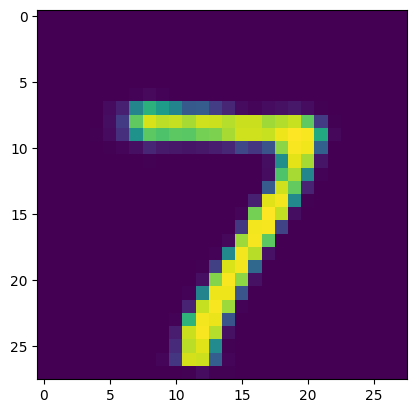

In [15]:
plt.imshow(encoded_imgs[0].reshape(28,28))

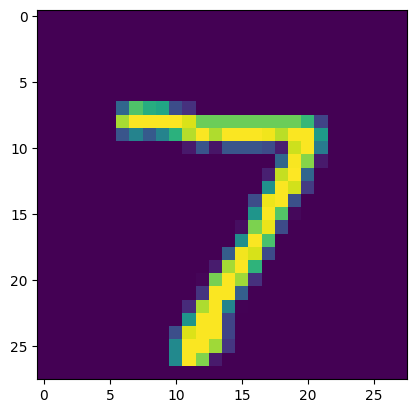

In [16]:
plt.imshow(X_test[0].reshape(28,28))